## MNIST(small) dataset Classification with KNN #prediction #Comparision on different values of k #Comparision on different values of train, test ratio

In [3]:
from sklearn.datasets import load_digits

In [4]:
dir(load_digits())

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
data=load_digits().data
images=load_digits().images
targets=load_digits().target

In [6]:
data.shape

(1797, 64)

In [7]:
images.shape

(1797, 8, 8)

In [8]:
targets.shape

(1797,)

In [9]:
images[445]

array([[ 0.,  0.,  3., 10., 13.,  7.,  0.,  0.],
       [ 0.,  1., 14., 13., 15., 14.,  0.,  0.],
       [ 0.,  0., 15.,  5., 14.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 10., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  7., 14., 16.,  3.,  0.],
       [ 0.,  4.,  5.,  0.,  2., 16.,  4.,  0.],
       [ 0., 10., 16., 10.,  8., 16.,  3.,  0.],
       [ 0.,  0.,  5., 12., 14.,  8.,  0.,  0.]])

8


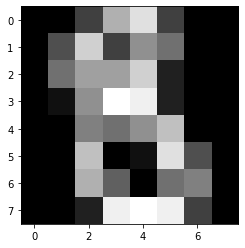

In [10]:
import matplotlib.pyplot as plt

index=378
plt.imshow(images[index], cmap="gray")
print(targets[index])


In [11]:
X = images.reshape(1797,64)
y = targets

In [12]:
X[445]

array([ 0.,  0.,  3., 10., 13.,  7.,  0.,  0.,  0.,  1., 14., 13., 15.,
       14.,  0.,  0.,  0.,  0., 15.,  5., 14.,  9.,  0.,  0.,  0.,  0.,
        0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 14., 16.,  3.,
        0.,  0.,  4.,  5.,  0.,  2., 16.,  4.,  0.,  0., 10., 16., 10.,
        8., 16.,  3.,  0.,  0.,  0.,  5., 12., 14.,  8.,  0.,  0.])

### Train test split of data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y,test_size=.2, random_state=7)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(5)

In [15]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
model.predict(X_test[:20])

array([6, 0, 5, 3, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1])

In [17]:
y_test[:20]

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1])

In [18]:
model.score(X_test, y_test)

0.975

In [19]:
test_sizes = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
score_list = []
value_of_k = 5
for size in test_sizes:
    #splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = 7)
    
    #creating a model
    model = KNeighborsClassifier(value_of_k)
    
    #fitting a train
    model.fit(X_train, y_train)
    
    #take out score
    score = model.score(X_test, y_test)
    
    #append to score_list
    score_list.append(score)
    
    

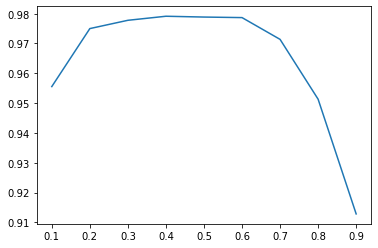

In [20]:
plt.plot(test_sizes, score_list)

### Plot scores with respect to different values of k in knn(score should be taken with random split of 5 data averaged)  

In [21]:
test_sizes = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
mean_score_list = []
size = .4
for k_value in range(1,31):
    
    score_list = []
    for i in range(10):
        #creating a model
        model = KNeighborsClassifier(value_of_k)

        #splitting data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size)
    
        #fitting a train
        model.fit(X_train, y_train)
    
        #take out score
        score = model.score(X_test, y_test)
    
        #append to score_list
        score_list.append(score)
        
    mean_score = sum(score_list)/10
    mean_score_list.append(mean_score)      
    
    

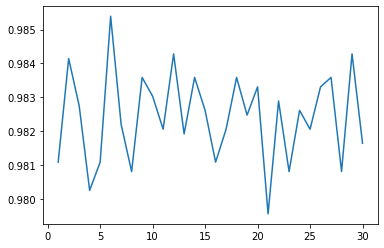

In [22]:
plt.plot(range(1,31), mean_score_list)

### Import confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, model.predict(X_test))

In [24]:
c_matrix

array([[79,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 71,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 74,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 73,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 64,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 74,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 72,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 67,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  1, 64,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  1, 69]], dtype=int64)

### Wrong prediction

In [25]:
wrong_prediction_of_1_X_test = X_test[(y_test != model.predict(X_test)) & (model.predict(X_test) == 1)]
wrong_prediction_of_1_X_test

array([[ 0.,  0.,  2., 12., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,
         9.,  1.,  0.,  0.,  0.,  6., 14., 13., 15.,  3.,  0.,  0.,  0.,
         1., 16., 16.,  4.,  0.,  0.,  0.,  0.,  7., 16., 14.,  0.,  0.,
         0.,  0.,  1., 15.,  9., 16.,  5.,  0.,  0.,  0.,  2., 13., 13.,
        16., 10.,  0.,  0.,  0.,  0.,  1., 11., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  2., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 14., 11.,
         0.,  0.,  0.,  0.,  0., 10.,  6., 14.,  5.,  2.,  0.,  0.,  0.,
         2., 14., 12., 14.,  0.,  0.,  0.,  0.,  1., 15., 13.,  2.,  0.,
         0.,  0.,  0., 11., 13., 14.,  1.,  0.,  0.,  0.,  0., 13.,  8.,
        10.,  4.,  0.,  0.,  0.,  0.,  2., 11., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 13.,
         3.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
        13., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16.,  5.,  0.,  0.,
         0.,  0.,  2., 16., 16., 16.,  5.,  0.,  0.,  0.,  

In [26]:
wrong_prediction_of_1_X_test = X_test[(y_test != model.predict(X_test)) & (model.predict(X_test) == 5)]
wrong_prediction_of_1_X_test_image =wrong_prediction_of_1_X_test.reshape(-1,8,8)

In [27]:
wrong_prediction_of_1_X_test_image.shape

(2, 8, 8)

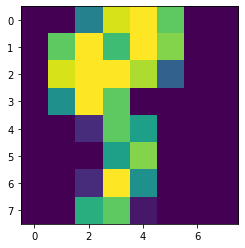

In [28]:
plt.imshow(wrong_prediction_of_1_X_test_image[0])